In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_qWM28Yl.csv to train_qWM28Yl.csv
User uploaded file "train_qWM28Yl.csv" with length 13820236 bytes


In [4]:
df = pd.read_csv('train_qWM28Yl.csv')

In [5]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### check for imbalance in dataset

In [6]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [7]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

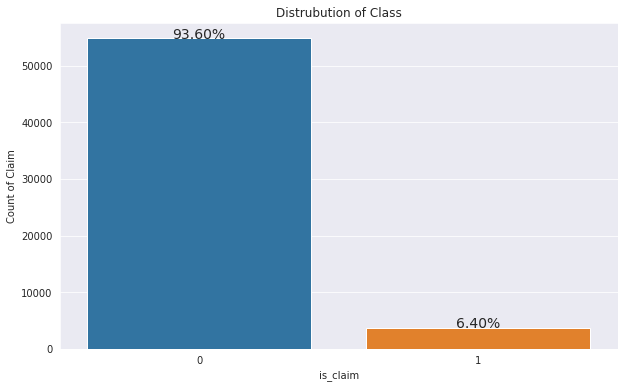

In [8]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(df['is_claim'])
plt.title("Distrubution of Class")
plt.ylabel('Count of Claim')
percentage_without_hue(ax, df['is_claim'], 0, 40, 14)

### Observation: Clearly Imbalanced Dataset

### EDA

In [10]:
for column in df.columns:
  print(column)
  print(df[column].value_counts())

policy_id
ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64
policy_tenure
0.515874    1
1.011813    1
0.031010    1
0.272315    1
0.588006    1
           ..
1.153225    1
0.317849    1
1.128647    1
0.097815    1
0.124429    1
Name: policy_tenure, Length: 58592, dtype: int64
age_of_car
0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26      24
0.29      21
0.32      13
0.33      12
0.36       8
0.34       6
0.39       5
0.38       4
1.00       3
0.37       3
0.49       2
0.46       2
0.44       2
0.42       1
0.

In [12]:
df['policy_id'].nunique()

58592

In [13]:
df['policy_tenure'].nunique()

58592

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [15]:
df['age_of_car'].nunique()

49

In [16]:
df['age_of_policyholder'].nunique()

75

In [17]:
#check for missing values
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [19]:
#check for duplicates
df.duplicated().any()

False

In [20]:
# Five number summary
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [7]:
#target&independent variable
X = df.drop(['policy_tenure', 'policy_id','is_claim'],axis=1)
y = df['is_claim']

In [37]:
y.mean()

0.06396777717094485

In [38]:
X.head()

,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
2,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
3,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


<h3> Split features into Numerical and Categorical

In [8]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [9]:
def unique_counts(var):
    counts = var.value_counts().count()
    return counts
unique_df = pd.DataFrame(num.apply(lambda x:unique_counts(x)))
unique_df

,0
age_of_car,49
age_of_policyholder,75
population_density,22
make,5
airbags,3
displacement,9
cylinder,2
gear_box,2
turning_radius,9
length,9


In [10]:
#dropping features with zero variance
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]    

In [11]:
unique_df = pd.DataFrame(num_1.apply(lambda x:unique_counts(x)), columns=['count'])
unique_df

,count
age_of_car,49
age_of_policyholder,75
population_density,22
make,5
airbags,3
displacement,9
cylinder,2
gear_box,2
turning_radius,9
length,9


In [12]:
slice1 = unique_df[unique_df['count']<=20]
cat_list = slice1.index
cat = num.loc[:,cat_list]
cat.dtypes

make                int64
airbags             int64
displacement        int64
cylinder            int64
gear_box            int64
turning_radius    float64
length              int64
width               int64
height              int64
gross_weight        int64
ncap_rating         int64
dtype: object

In [13]:
slice2 = unique_df[unique_df['count']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

age_of_car             float64
age_of_policyholder    float64
population_density       int64
dtype: object

In [14]:
char=pd.concat([char,cat],axis=1,join="inner")
char.head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes,1,2,796,3,5,4.6,3445,1515,1475,1185,0
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes,1,2,796,3,5,4.6,3445,1515,1475,1185,0
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes,1,2,796,3,5,4.6,3445,1515,1475,1185,0
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,Automatic,Electric,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1,2,1197,4,5,4.8,3995,1735,1515,1335,2
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,2,999,3,5,5.0,3731,1579,1490,1155,2


<h3> Outlier Analysis of Numerical Features

In [46]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

,age_of_car,age_of_policyholder,population_density
count,58592.000000,58592.000000,58592.000000
mean,0.069424,0.469420,18826.858667
std,0.056721,0.122886,17660.174792
min,0.000000,0.288462,290.000000
1%,0.000000,0.288462,290.000000
5%,0.000000,0.298077,4076.000000
10%,0.010000,0.317308,4076.000000
25%,0.020000,0.365385,6112.000000
50%,0.060000,0.451923,8794.000000
75%,0.110000,0.548077,27003.000000


<h3> Bi Variate Analysis (Feature Discretization)

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbin.fit_transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')
num_binned.head()

,age_of_car_rank,age_of_policyholder_rank,population_density_rank
0,4.0,9.0,1.0
1,2.0,2.0,6.0
2,2.0,3.0,1.0
3,7.0,4.0,5.0
4,7.0,8.0,7.0


In [16]:
num_combined = pd.concat([num, y], axis=1, join='inner')

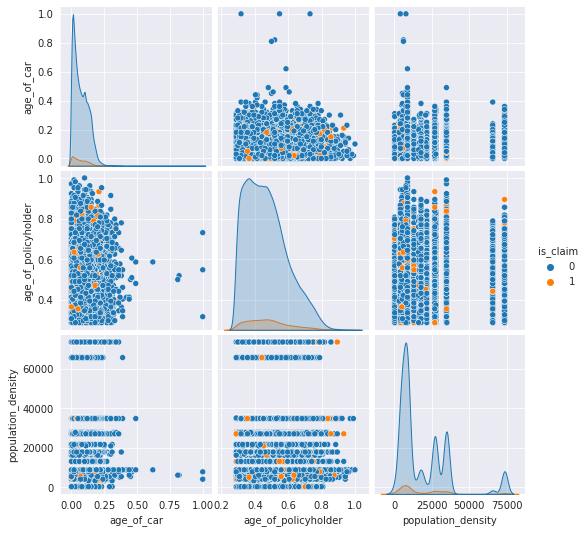

In [49]:
sns.pairplot(data=num_combined, hue='is_claim')

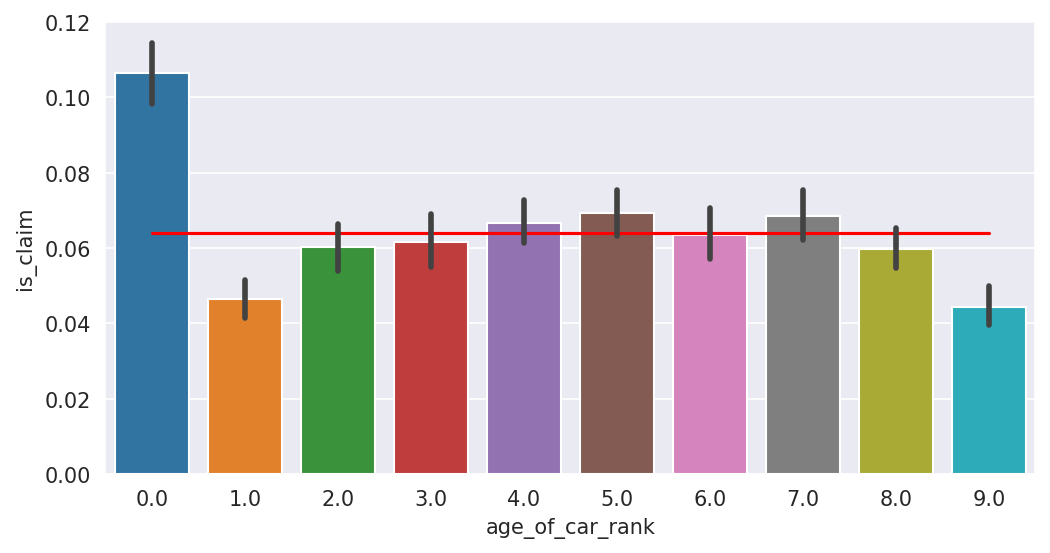

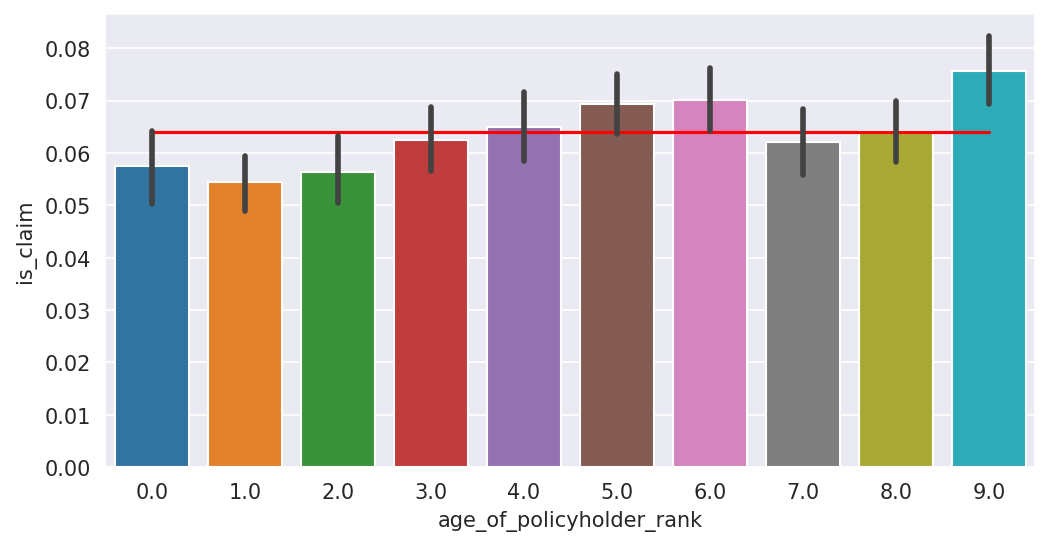

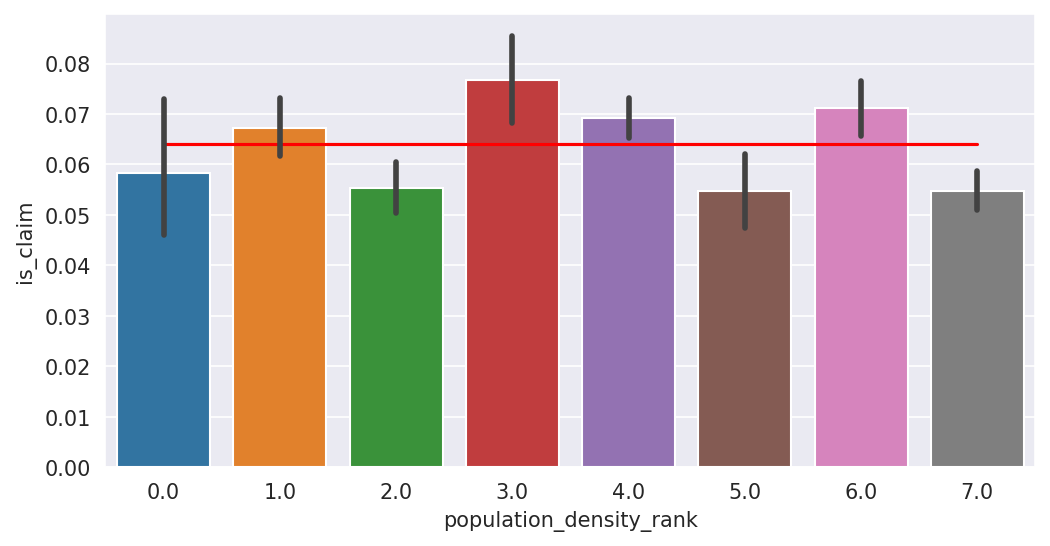

In [51]:
X_bin_combined = pd.concat([num_binned, y], axis=1, join='inner')
for col in num_binned.columns:
    plt.figure(figsize=(8,4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='is_claim', data=X_bin_combined, estimator=np.mean)
plt.show()

In [17]:
num.corr()

,age_of_car,age_of_policyholder,population_density
age_of_car,1.000000,-0.035427,-0.062255
age_of_policyholder,-0.035427,1.000000,0.009669
population_density,-0.062255,0.009669,1.000000


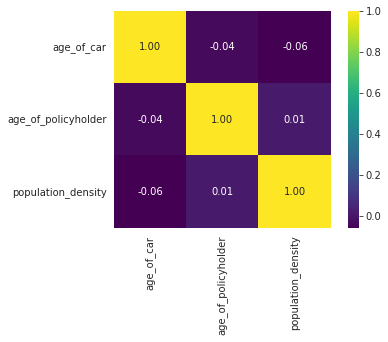

In [53]:
sns.heatmap(num.corr(), fmt='.2f', square=True, annot=True, cmap='viridis')

<h3> Feature Selection - Categorical Features

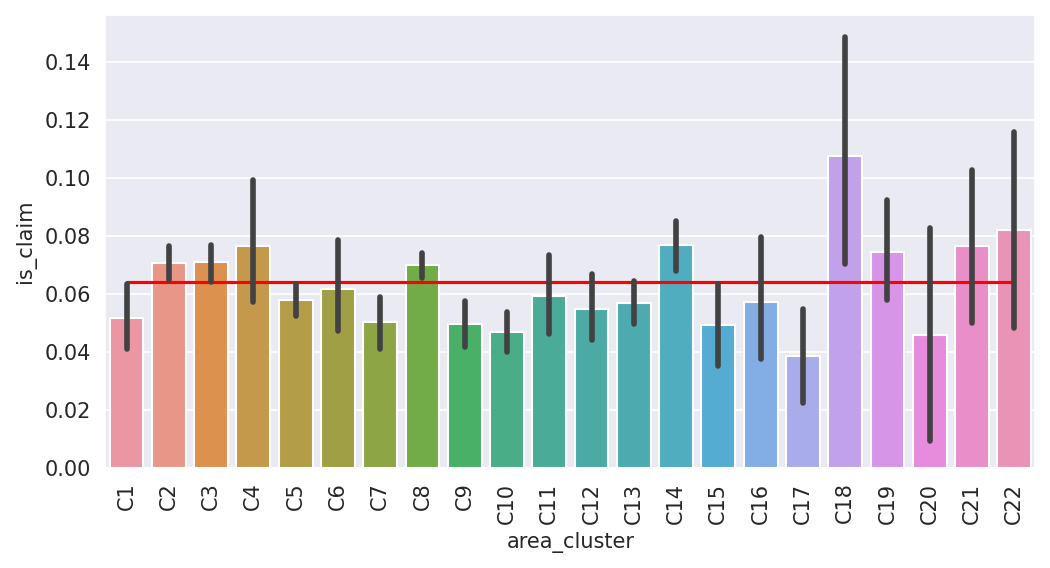

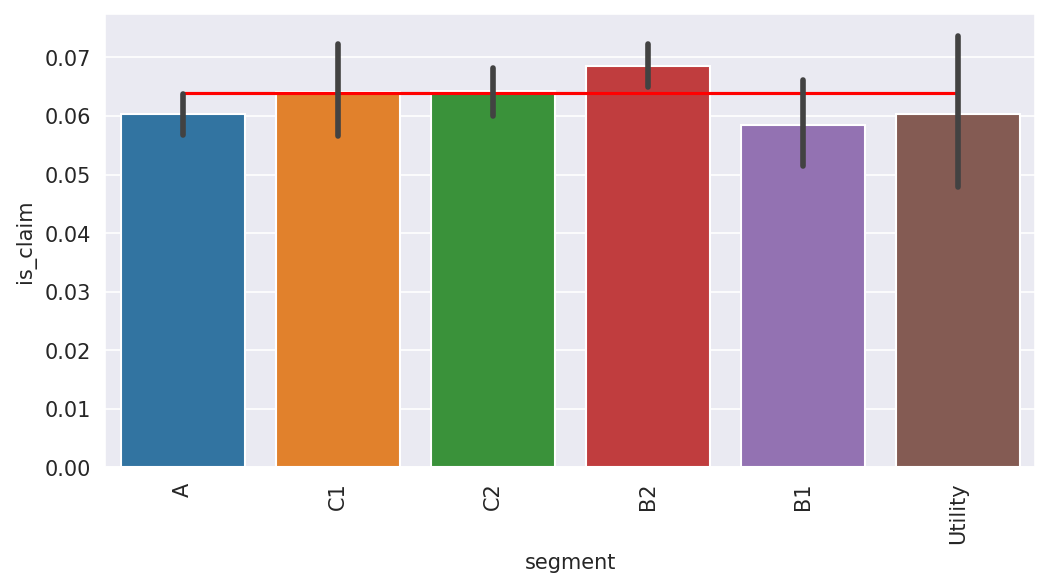

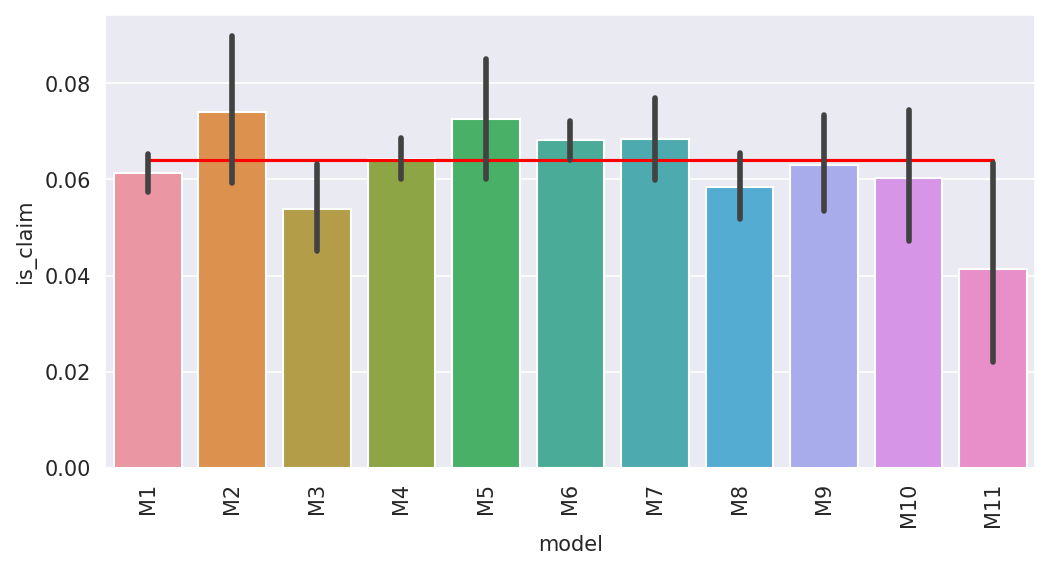

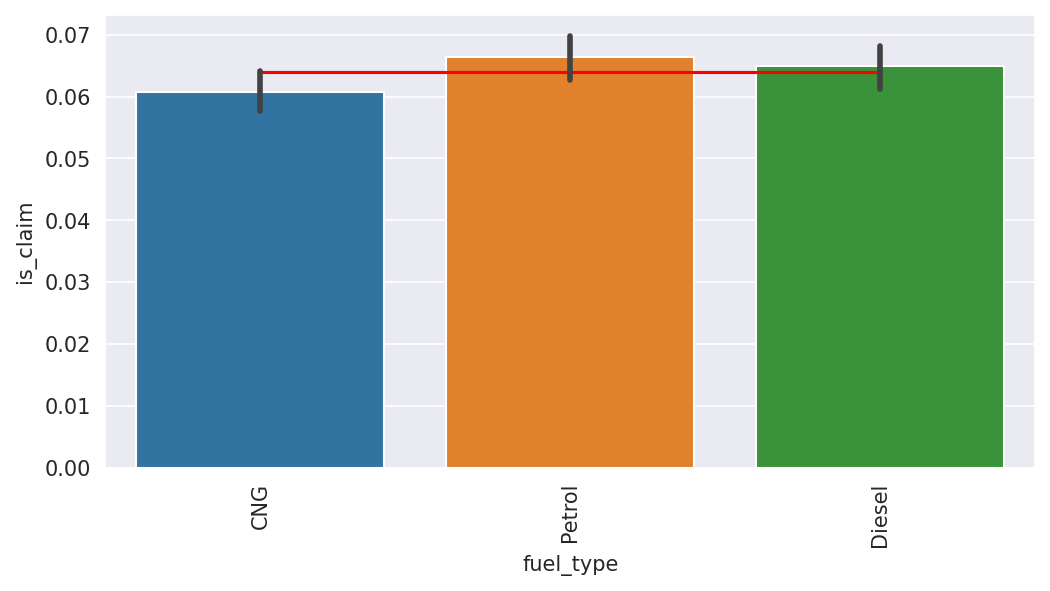

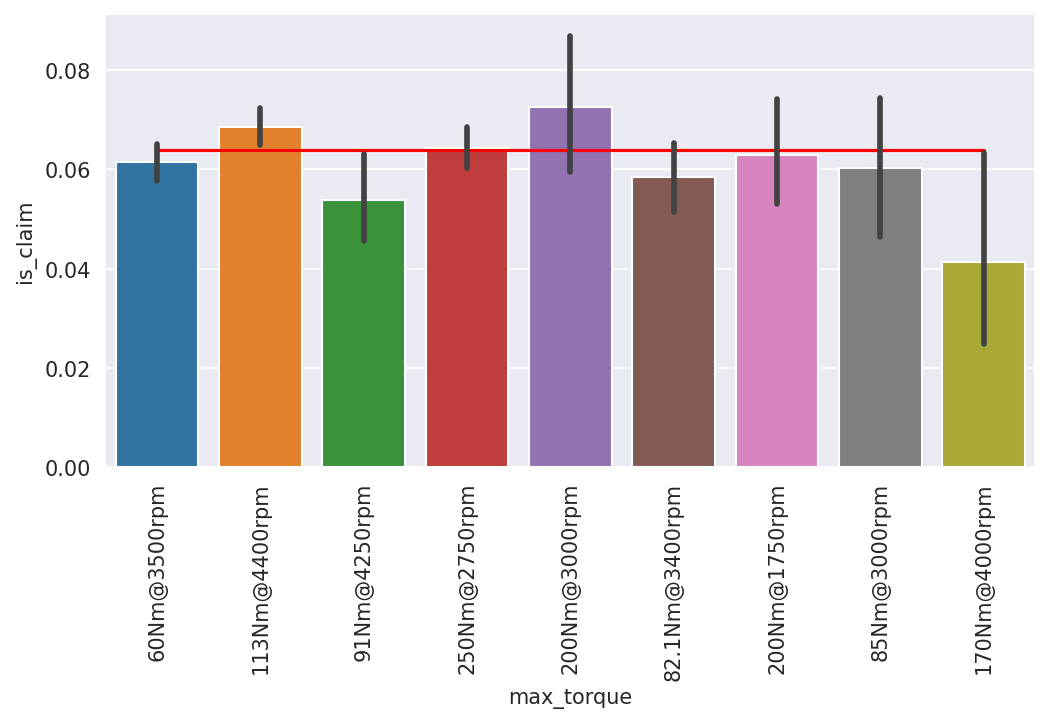

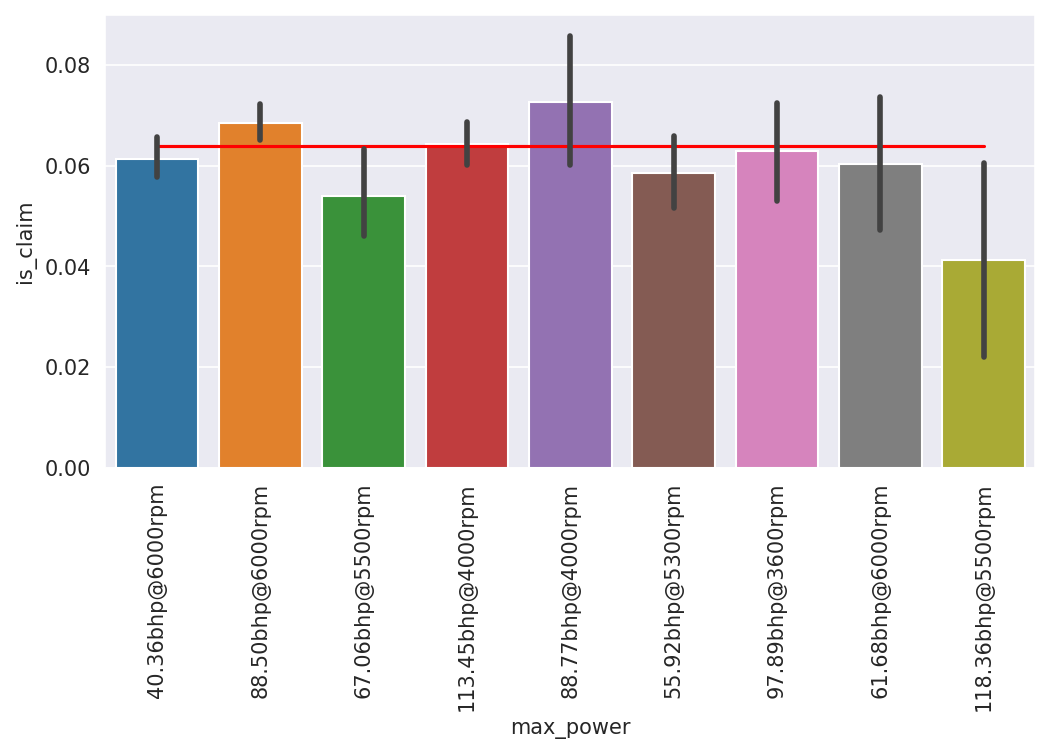

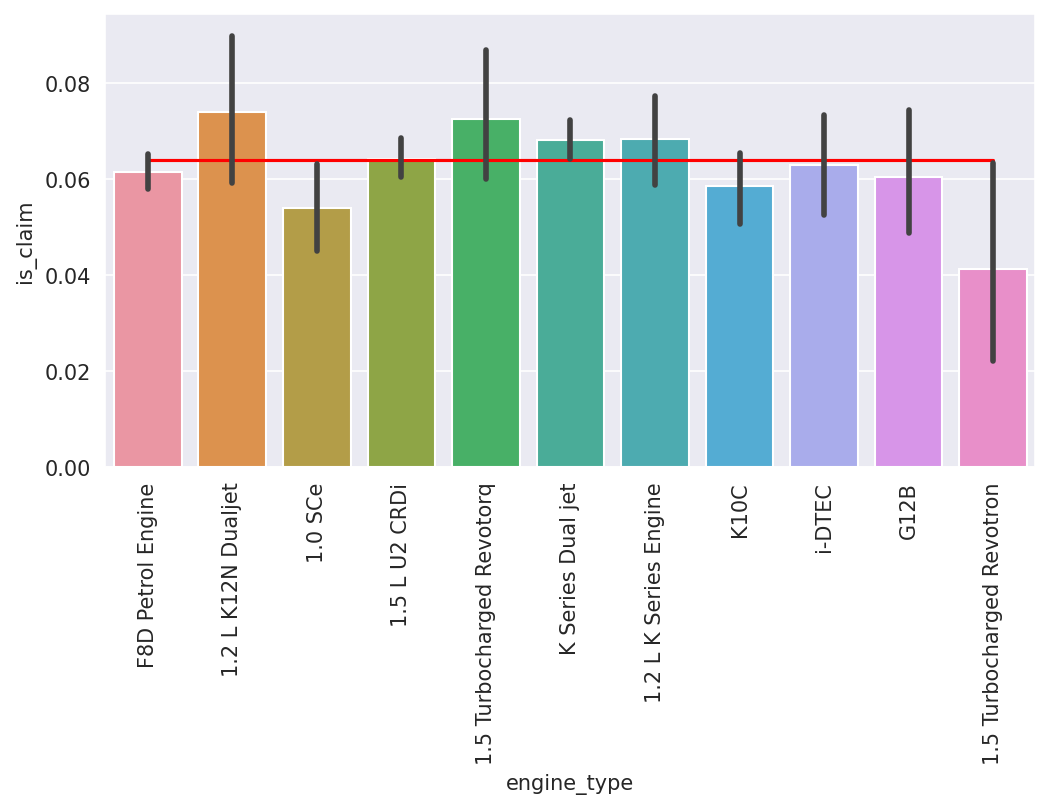

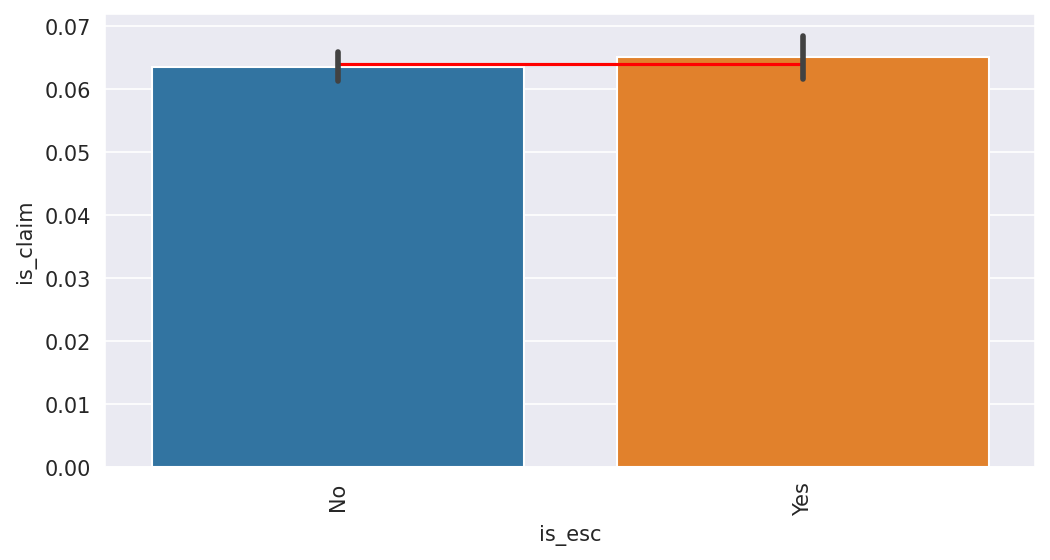

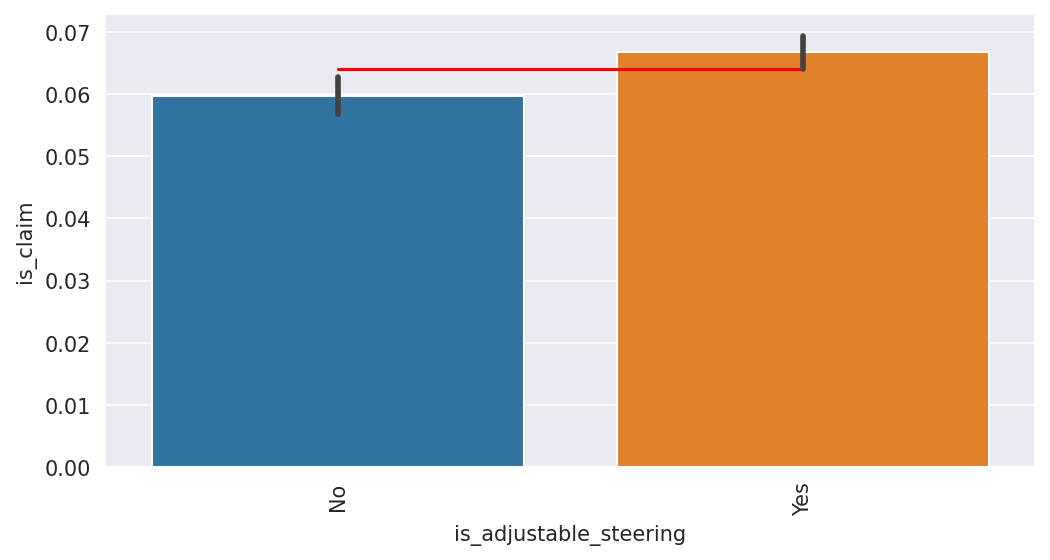

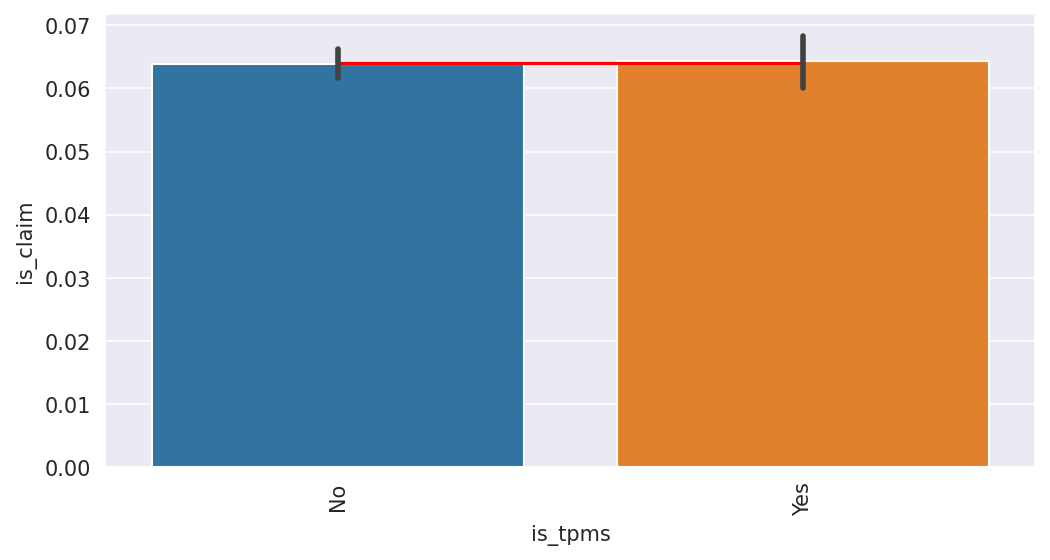

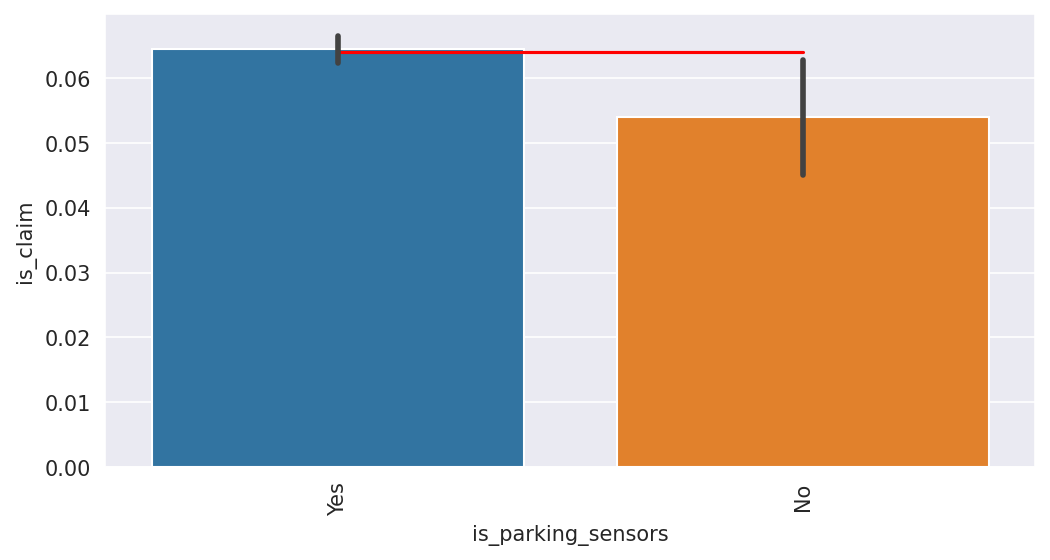

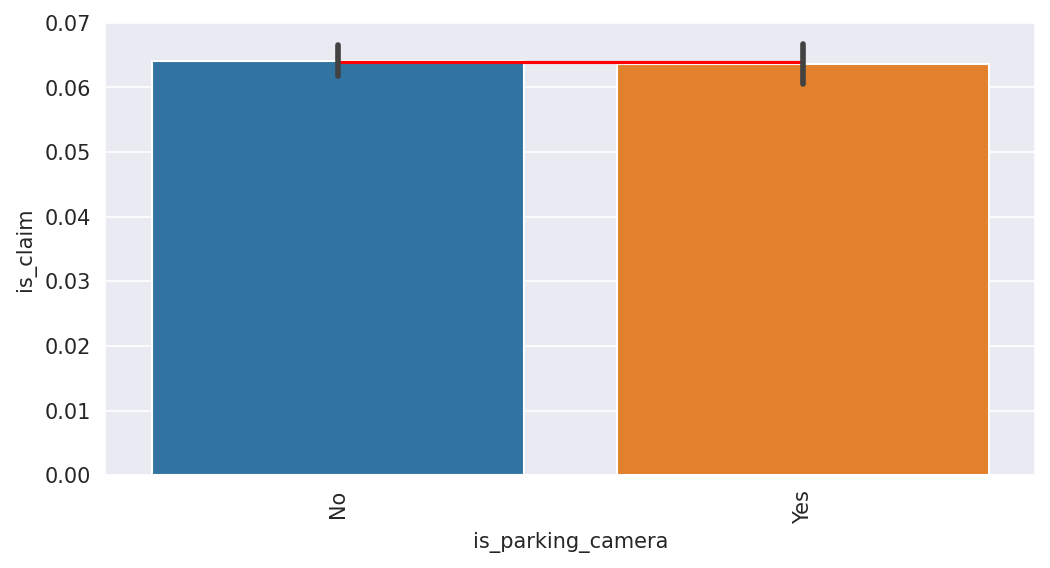

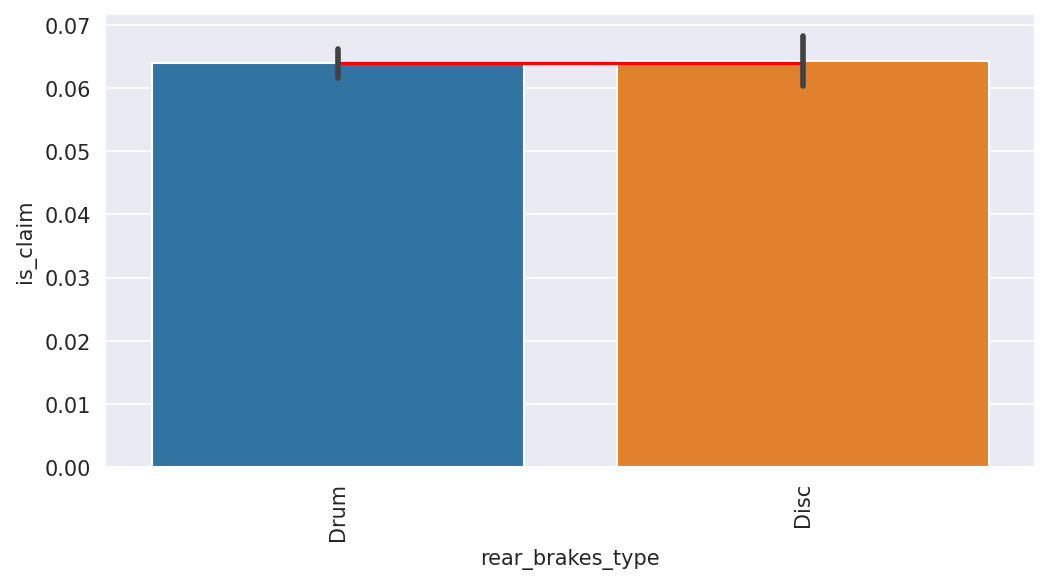

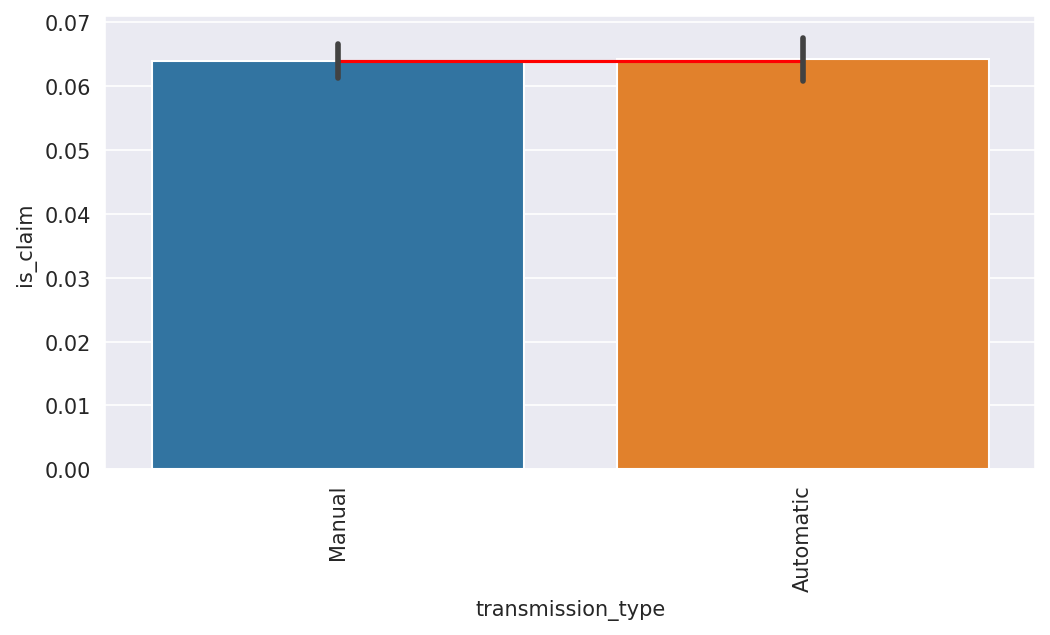

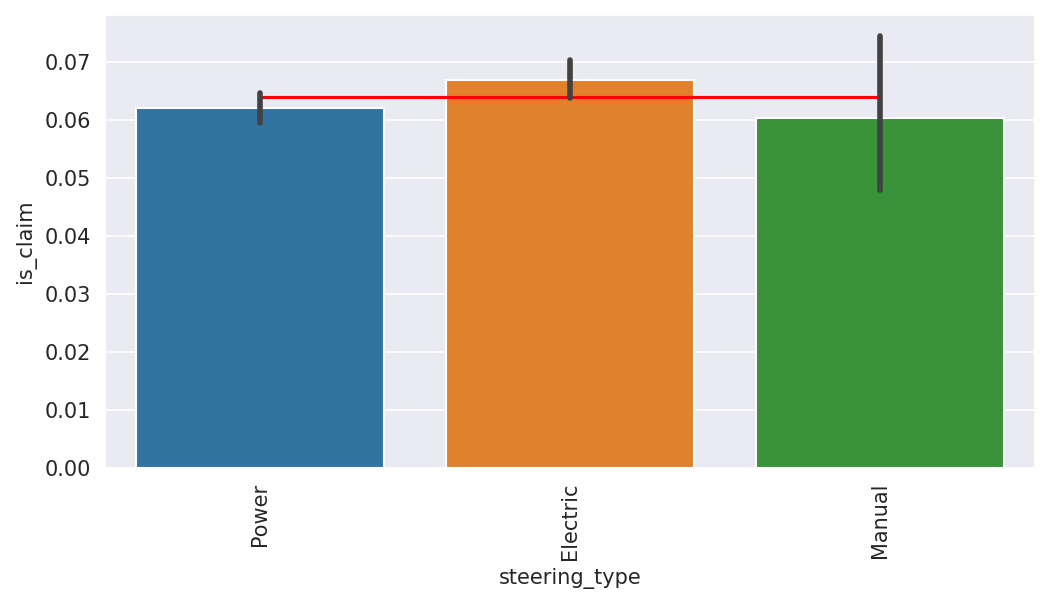

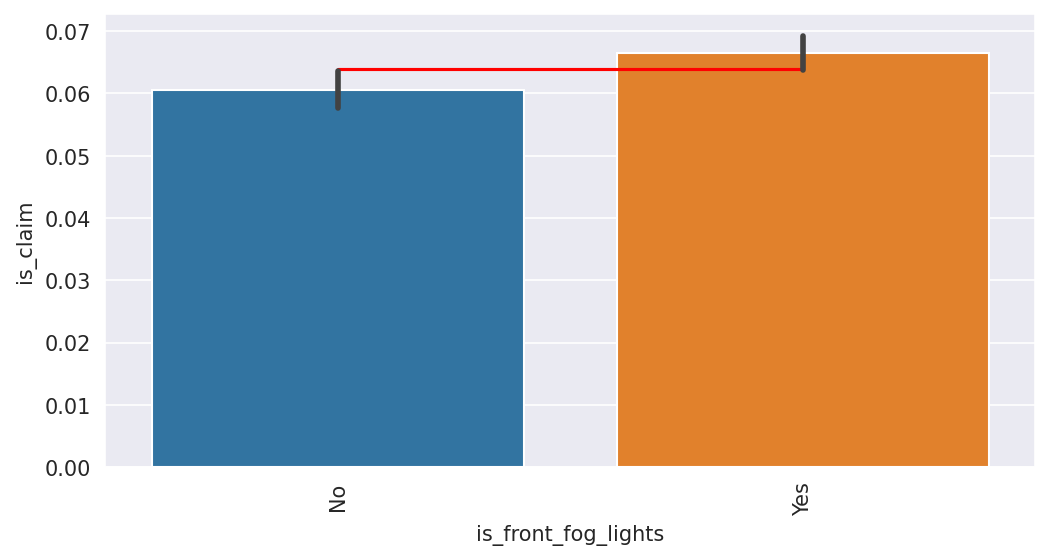

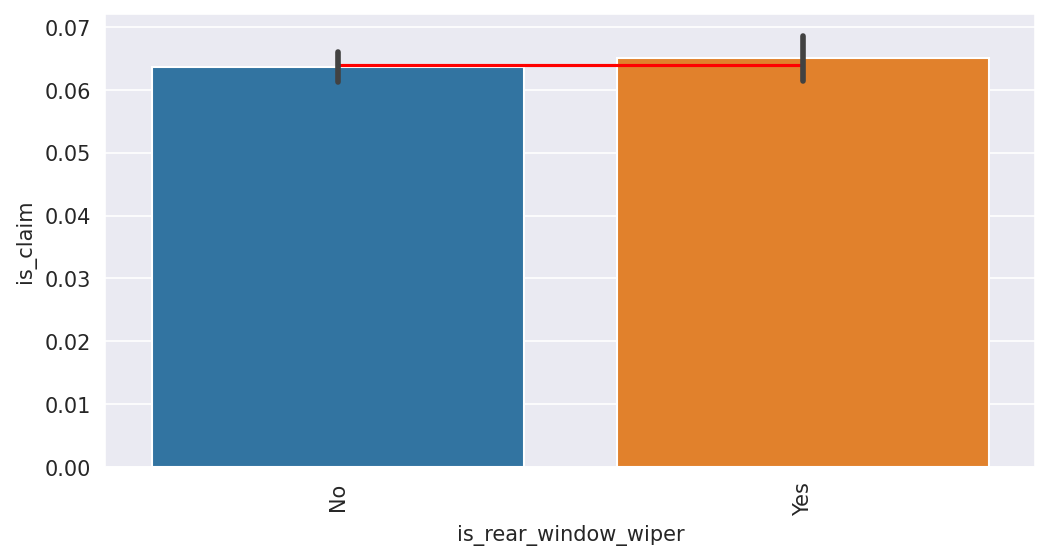

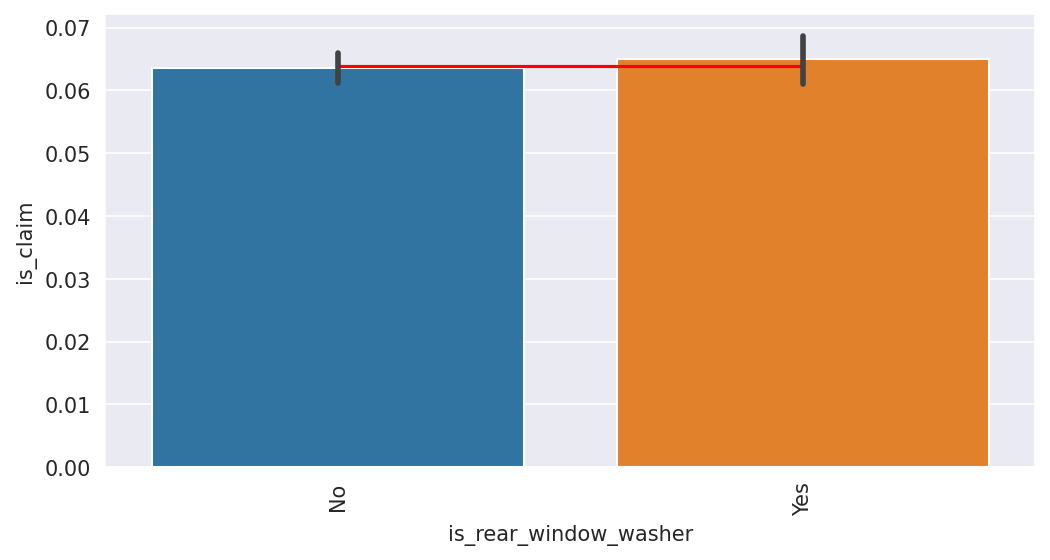

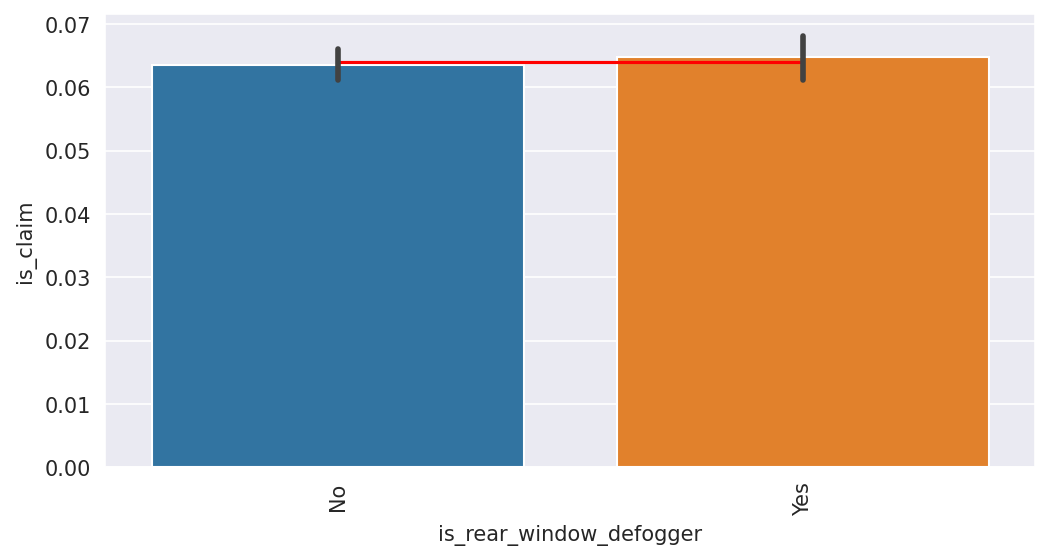

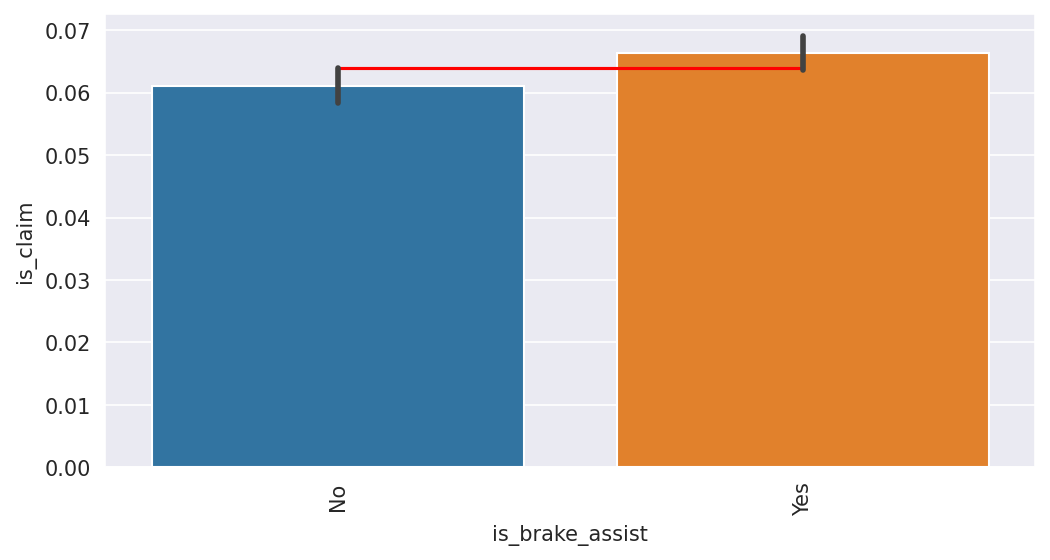

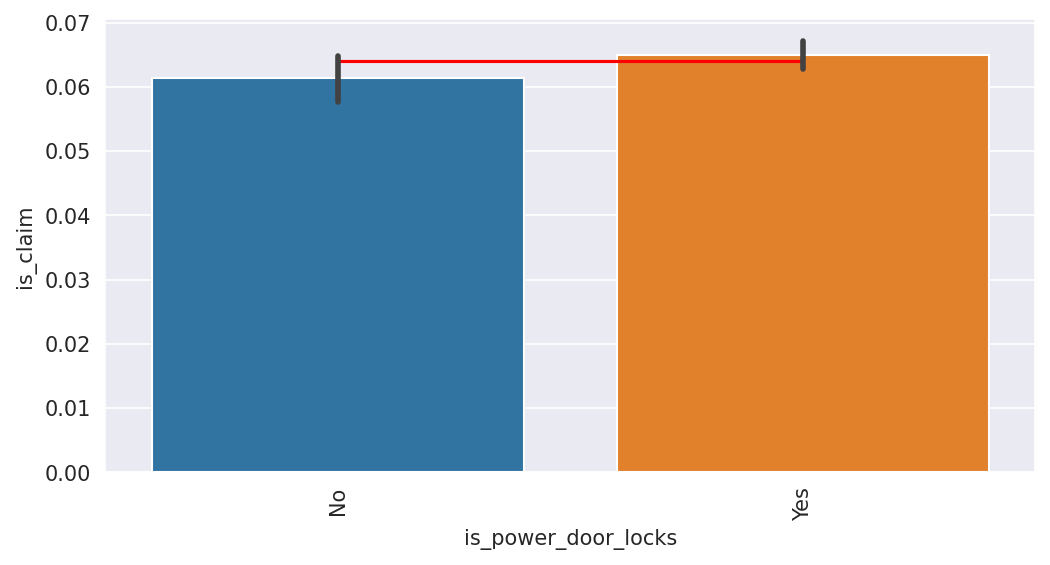

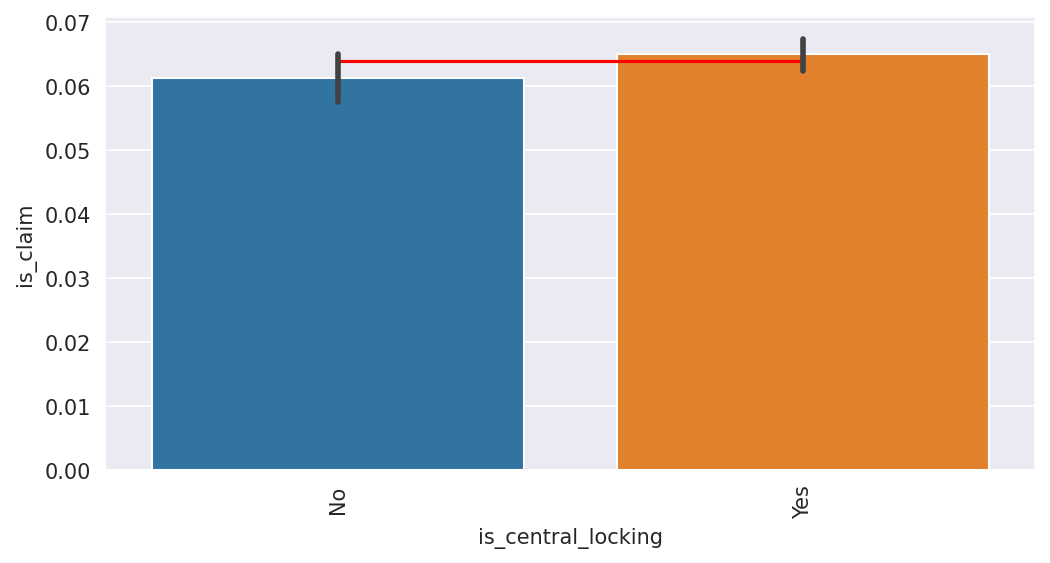

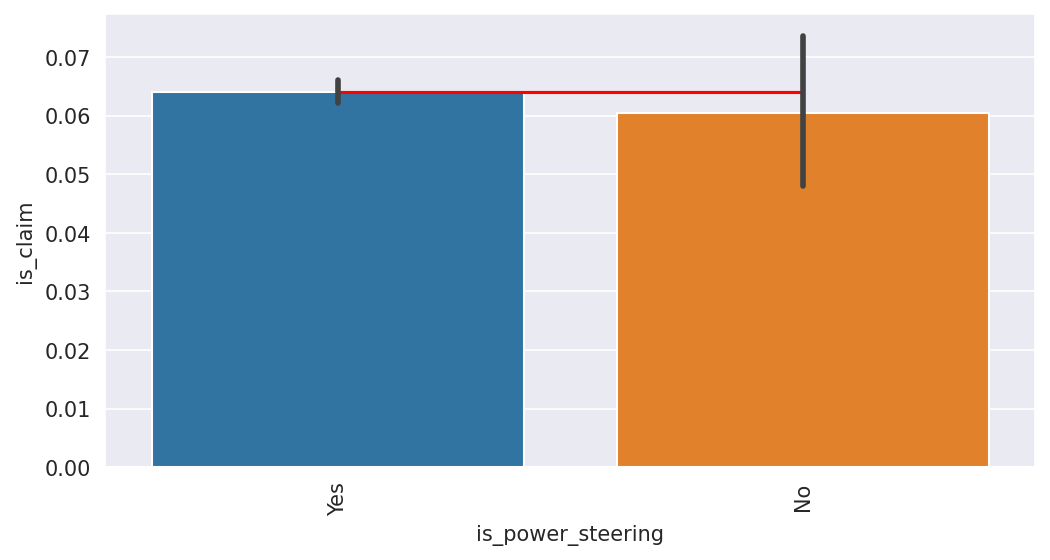

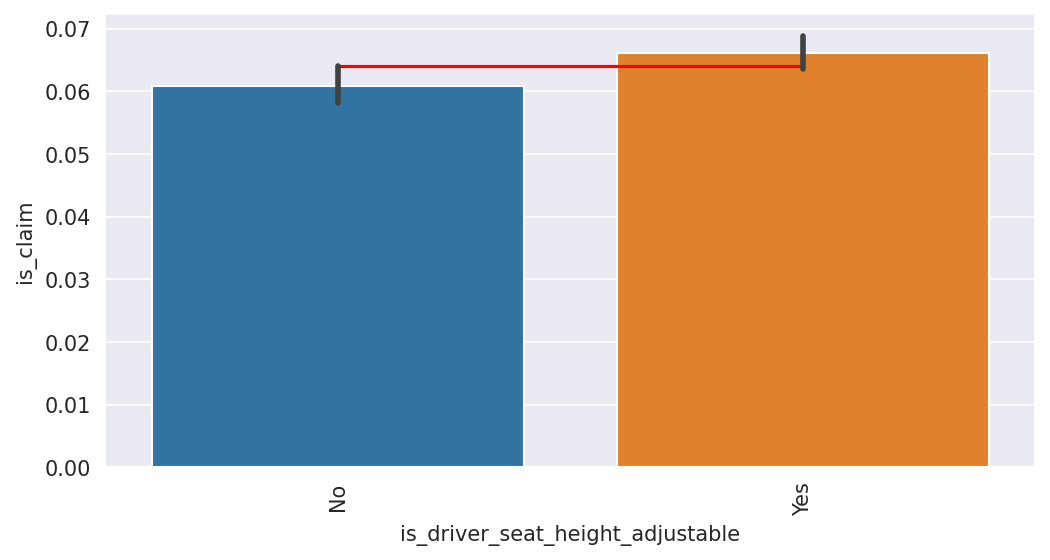

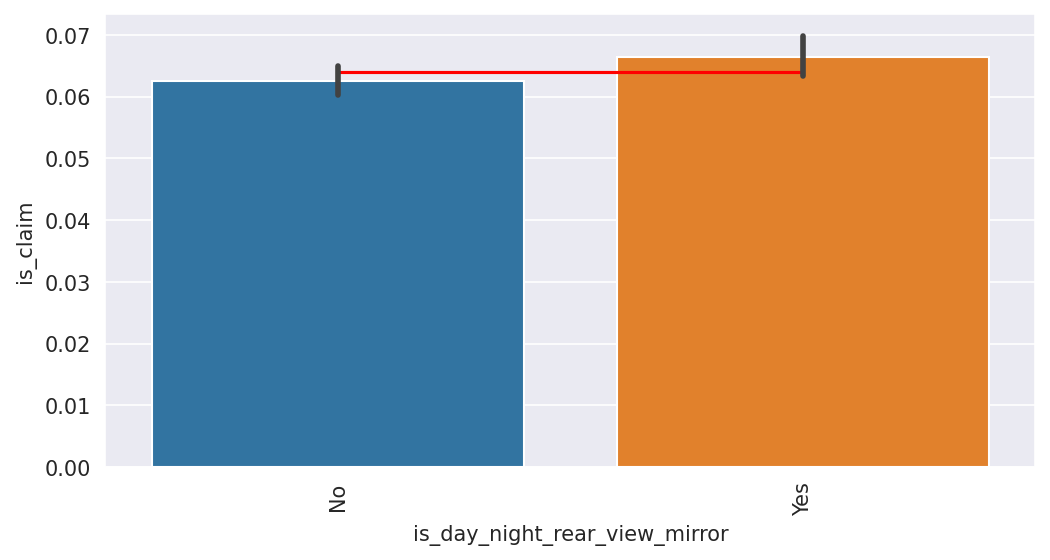

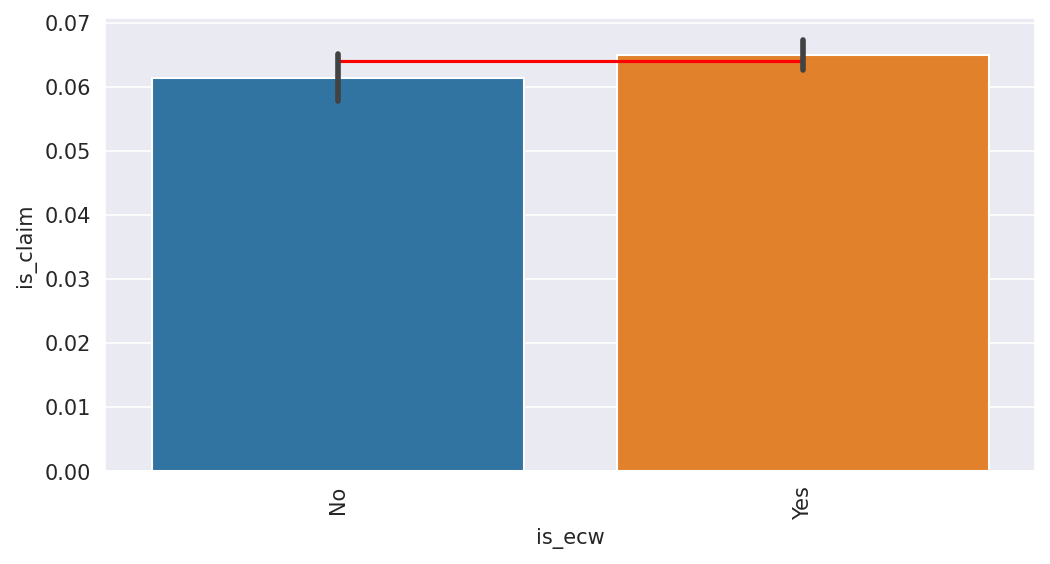

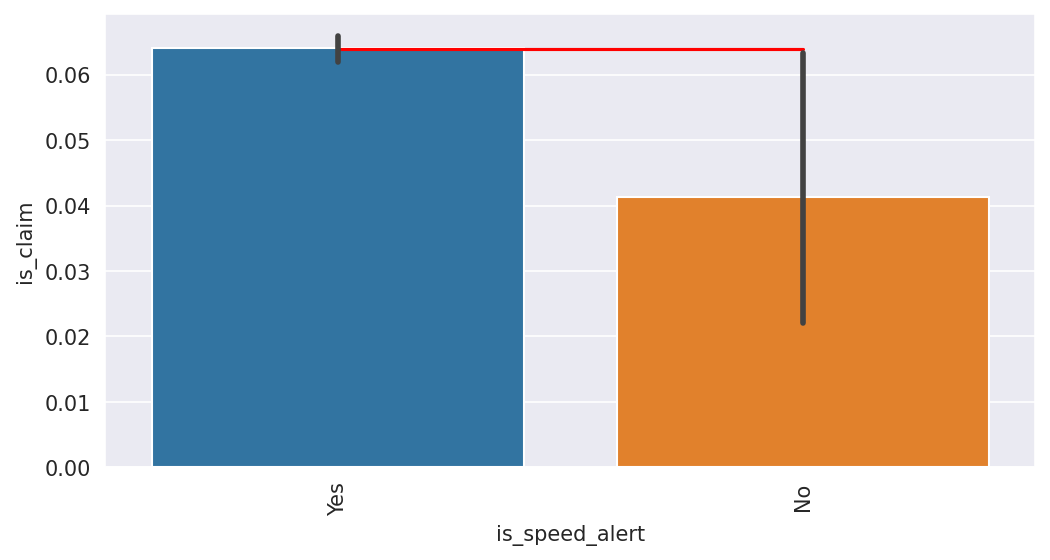

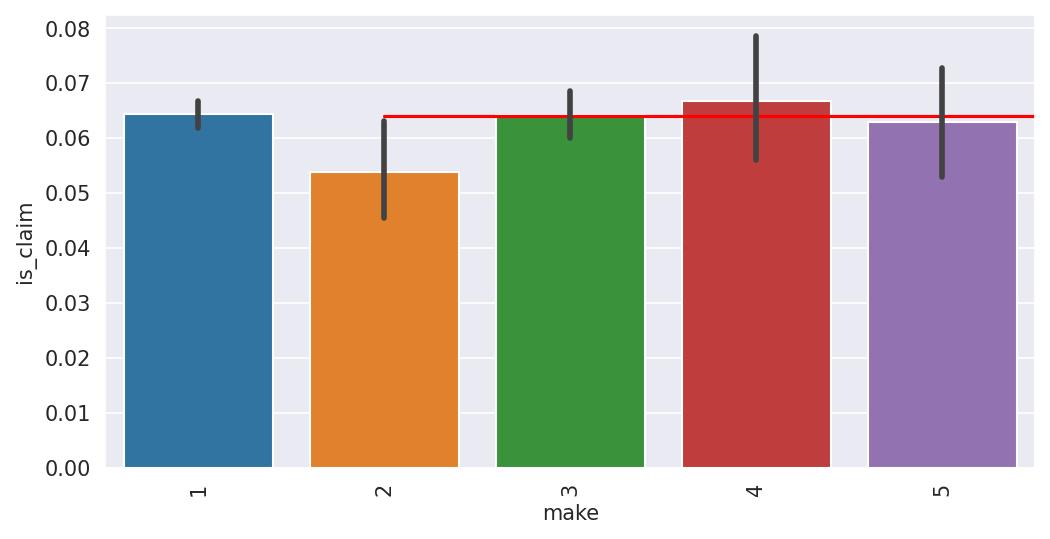

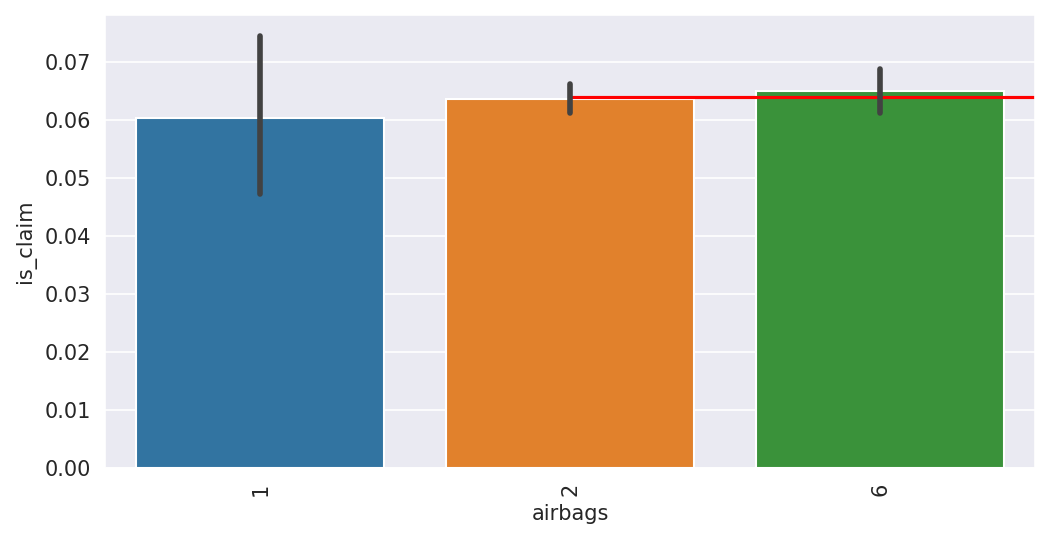

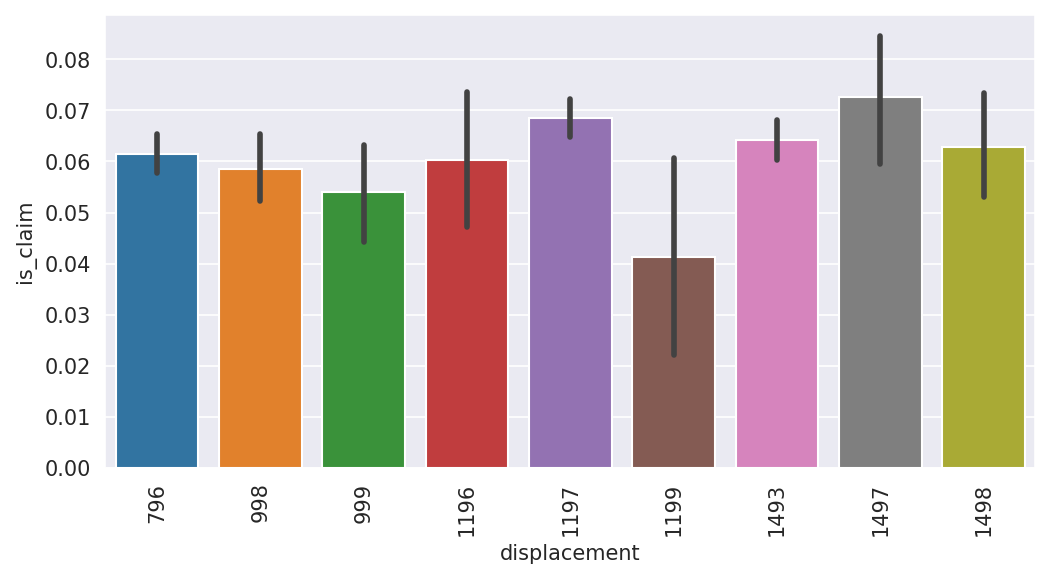

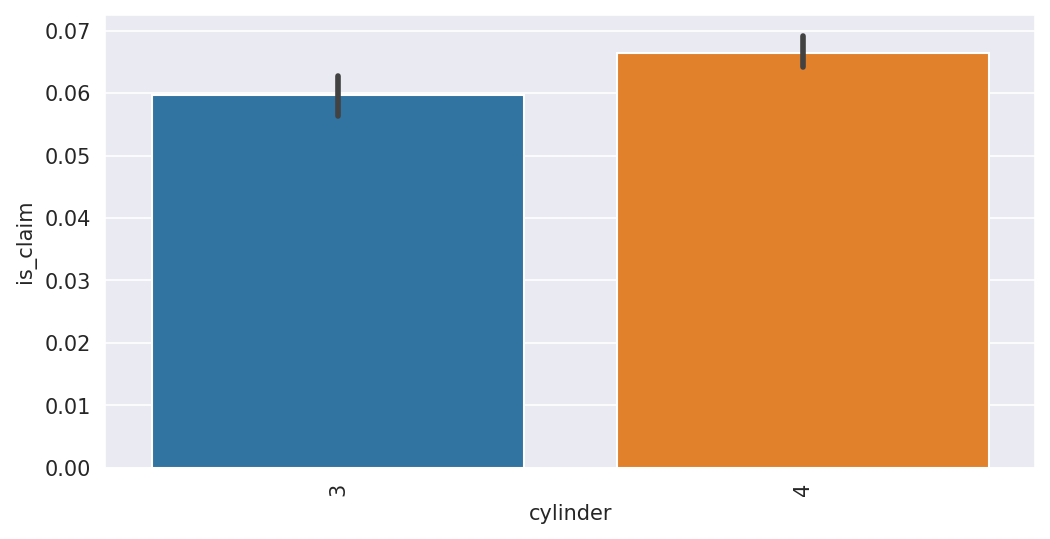

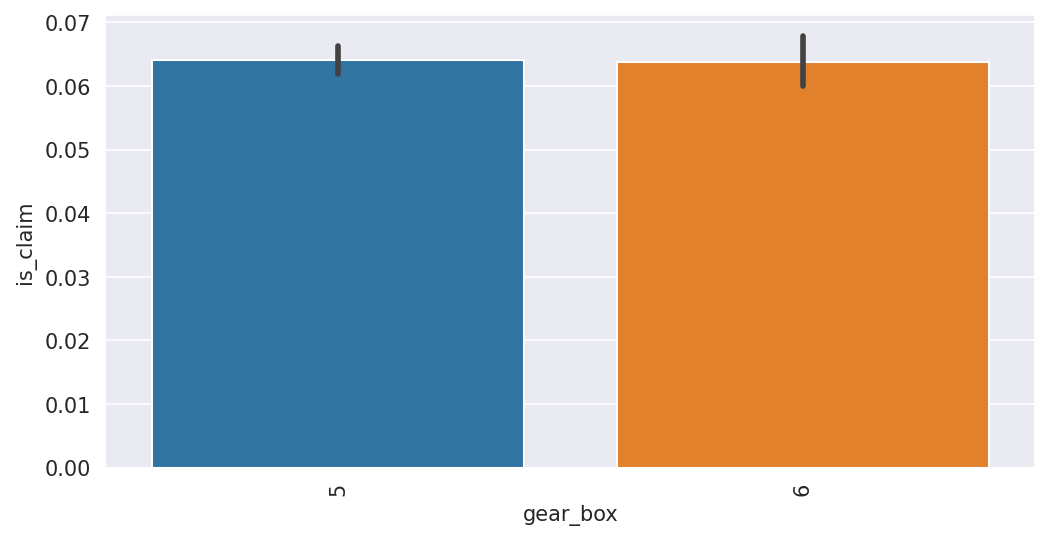

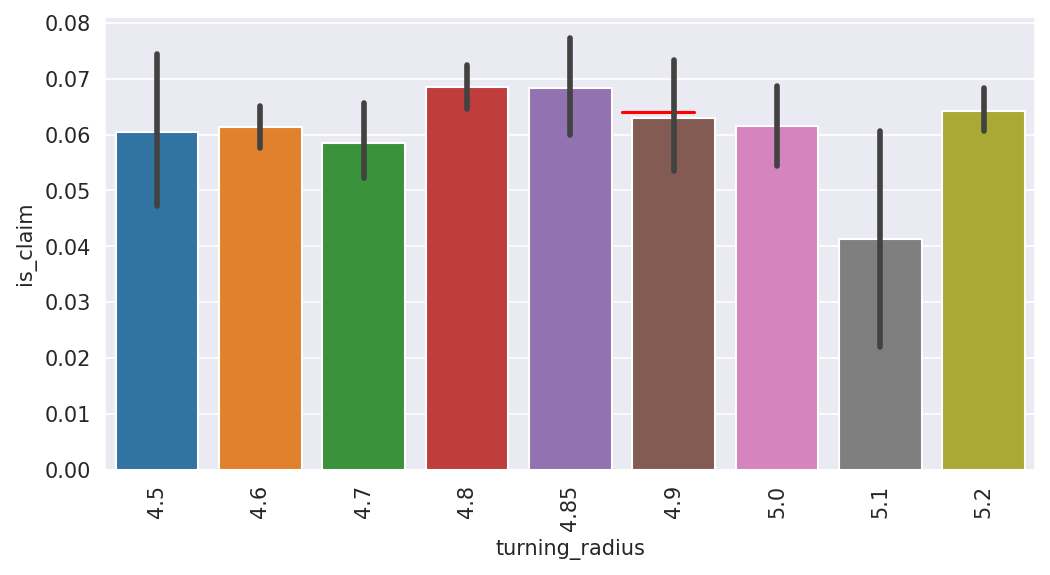

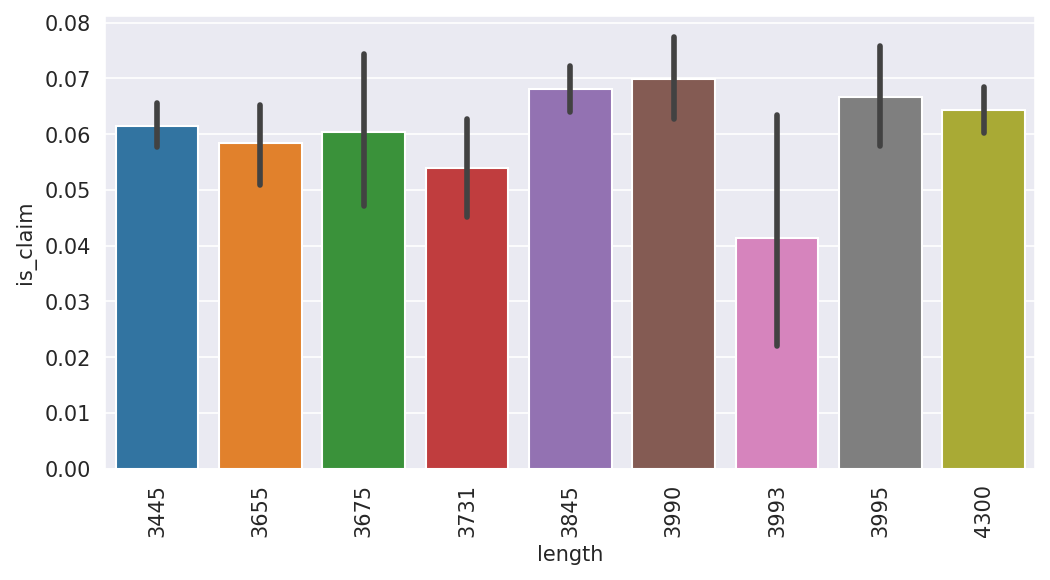

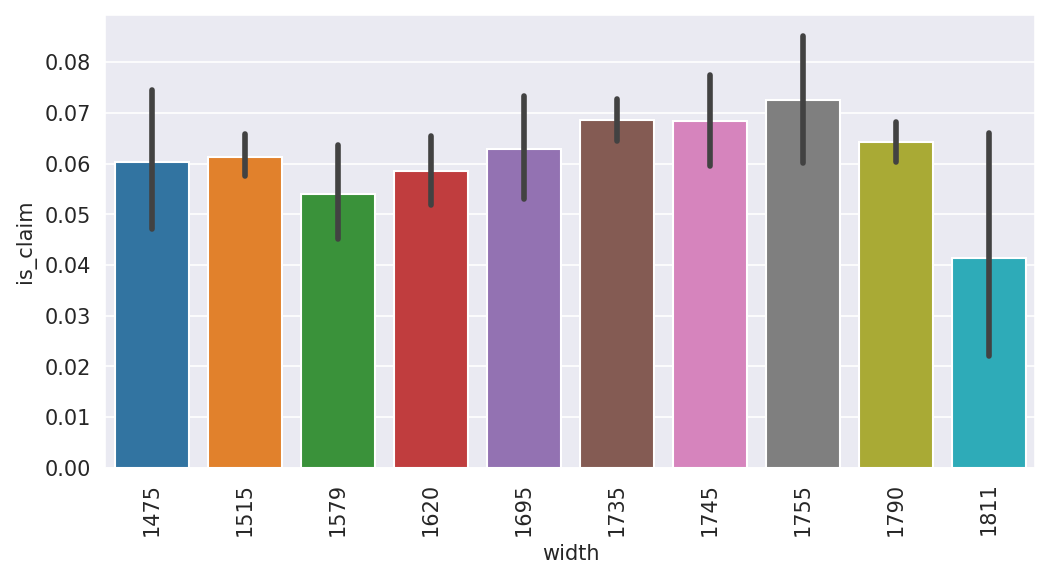

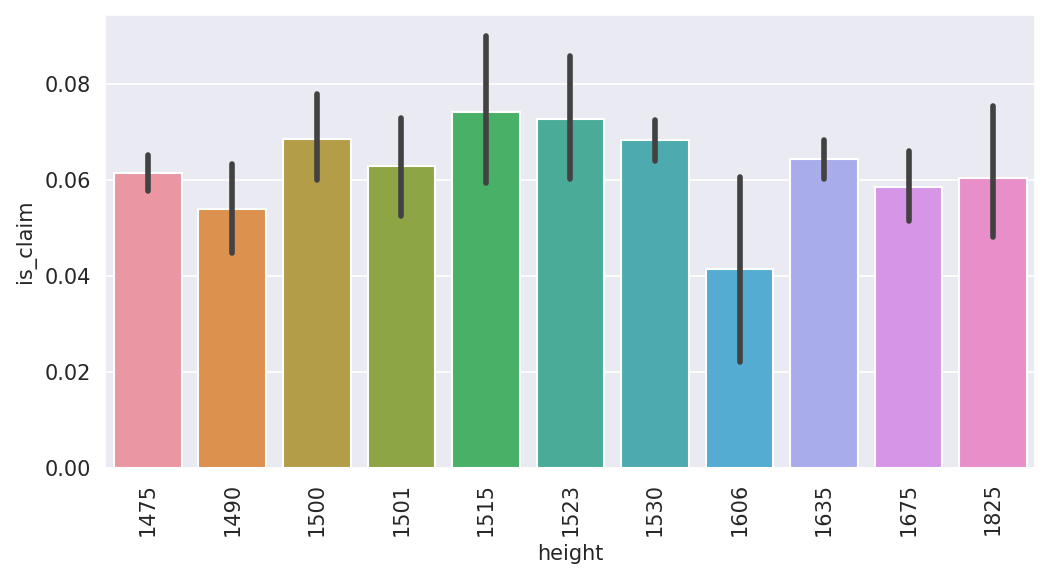

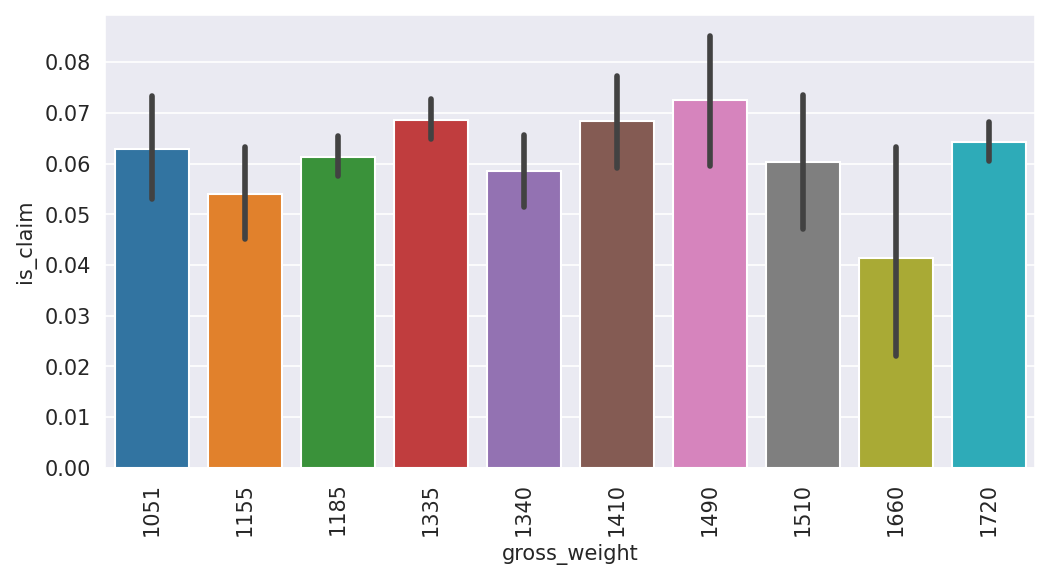

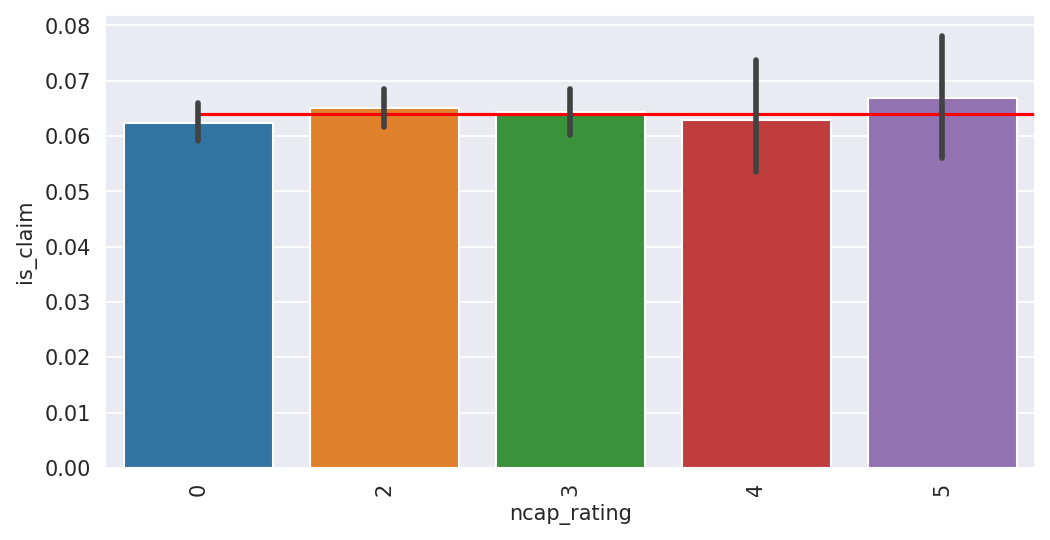

In [54]:
X_char_merged = pd.concat([char, y],axis=1,join='inner')

for col in char.columns:
    plt.figure(figsize=(8, 4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='is_claim', data=X_char_merged, estimator=np.mean)
    plt.xticks(rotation=90)
plt.show()

In [55]:
char.dtypes

area_cluster                         object
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
transmission_type                    object
steering_type                        object
is_front_fog_lights                  object
is_rear_window_wiper                 object
is_rear_window_washer                object
is_rear_window_defogger              object
is_brake_assist                      object
is_power_door_locks                  object
is_central_locking                   object
is_power_steering               

In [18]:
char['make']=char['make'].astype('object')
char['airbags']=char['airbags'].astype('object')
char['displacement']=char['displacement'].astype('object')
char['cylinder']=char['cylinder'].astype('object')
char['gear_box']=char['gear_box'].astype('object')
char['turning_radius']=char['turning_radius'].astype('object')
char['length']=char['length'].astype('object')
char['width']=char['width'].astype('object')
char['height']=char['height'].astype('object')
char['gross_weight']=char['gross_weight'].astype('object')
char['ncap_rating']=char['ncap_rating'].astype('object')

In [19]:
char.dtypes

area_cluster                        object
segment                             object
model                               object
fuel_type                           object
max_torque                          object
max_power                           object
engine_type                         object
is_esc                              object
is_adjustable_steering              object
is_tpms                             object
is_parking_sensors                  object
is_parking_camera                   object
rear_brakes_type                    object
transmission_type                   object
steering_type                       object
is_front_fog_lights                 object
is_rear_window_wiper                object
is_rear_window_washer               object
is_rear_window_defogger             object
is_brake_assist                     object
is_power_door_locks                 object
is_central_locking                  object
is_power_steering                   object
is_driver_s

In [20]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(58592, 149)

In [21]:
X_char_dum.head()

,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,make_2,make_3,make_4,make_5,airbags_2,airbags_6,displacement_998,displacement_999,displacement_1196,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,cylinder_4,gear_box_6,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,length_3655,length_3675,length_3731,length_3845,length_3990,length_3993,length_3995,length_4300,width_1515,width_1579,width_1620,width_1695,width_1735,width_1745,width_1755,width_1790,width_1811,height_1490,height_1500,height_1501,height_1515,height_1523,height_1530,height_1606,height_1635,height_1675,height_1825,gross_weight_1155,gross_weight_1185,gross_weight_1335,gross_weight_1340,gross_weight_1410,gross_weight_1490,gross_weight_1510,gross_weight_1660,gross_weight_1720,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0

In [22]:
num_binned.head()

,age_of_car_rank,age_of_policyholder_rank,population_density_rank
0,4.0,9.0,1.0
1,2.0,2.0,6.0
2,2.0,3.0,1.0
3,7.0,4.0,5.0
4,7.0,8.0,7.0


<h3> Creating the Master Feature Set for Model Development

In [130]:
X_all = pd.concat([num_binned, X_char_dum], axis=1, join="inner")

In [131]:
X_all.head()

,age_of_car_rank,age_of_policyholder_rank,population_density_rank,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,make_2,make_3,make_4,make_5,airbags_2,airbags_6,displacement_998,displacement_999,displacement_1196,displacement_1197,displacement_1199,displacement_1493,displacement_1497,displacement_1498,cylinder_4,gear_box_6,turning_radius_4.6,turning_radius_4.7,turning_radius_4.8,turning_radius_4.85,turning_radius_4.9,turning_radius_5.0,turning_radius_5.1,turning_radius_5.2,length_3655,length_3675,length_3731,length_3845,length_3990,length_3993,length_3995,length_4300,width_1515,width_1579,width_1620,width_1695,width_1735,width_1745,width_1755,width_1790,width_1811,height_1490,height_1500,height_1501,height_1515,height_1523,height_1530,height_1606,height_1635,height_1675,height_1825,gross_weight_1155,gross_weight_1185,gross_weight_1335,gross_weight_1340,gross_weight_1410,gross_weight_1490,gross_weight_1510,gross_weight_1660,gross_weight_1720,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,4.0,9.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7.0,4.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,7.0,8.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [25]:
X_all.dtypes

age_of_car_rank             float64
age_of_policyholder_rank    float64
population_density_rank     float64
area_cluster_C10              uint8
area_cluster_C11              uint8
                             ...   
gross_weight_1720             uint8
ncap_rating_2                 uint8
ncap_rating_3                 uint8
ncap_rating_4                 uint8
ncap_rating_5                 uint8
Length: 152, dtype: object

<h3> Train Test Split

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.20, random_state=101)

In [100]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("claim Rate in Training Data", y_train.mean())
print("claim Rate in Testing Data", y_test.mean())

Shape of Training Data (46873, 152)
Shape of Testing Data (11719, 152)
claim Rate in Training Data 0.06325603225737632
claim Rate in Testing Data 0.06681457462240806


In [66]:
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Black Box Ensemble Methods - Random Forest (With Bagging)

In [133]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(sampling_strategy=1)
x_tr_os, y_tr_os = oversample.fit_resample(X_train, y_train)
counter = Counter(y_tr_os)
claim_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_claim_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(claim_percentage, non_claim_percentage))

Fraud Percentage = 50.00% and Non-Fraud Percentage = 50.00%


In [134]:
x_tr_os.shape

(87816, 152)

In [102]:
# Building a Decision Tree Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [33]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='accuracy')
tree_grid.fit(x_tr_os,y_tr_os) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [135]:
dtree.set_params(criterion='gini', max_depth=5, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [136]:
dtree.fit(x_tr_os, y_tr_os)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [137]:
pred = dtree.predict(X_test)

In [138]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, confusion_matrix

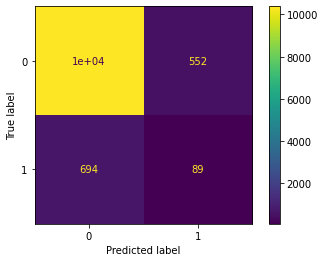

In [139]:
plot_confusion_matrix(dtree, X_test, y_test)

In [140]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10936
           1       0.14      0.11      0.12       783

    accuracy                           0.89     11719
   macro avg       0.54      0.53      0.53     11719
weighted avg       0.88      0.89      0.89     11719



In [141]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [142]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [76]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy')
rforest_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [143]:
rforest.set_params(criterion = 'gini',
                  min_samples_leaf = 30,
                  min_samples_split = 20,
                  max_depth = 5,
                  n_estimators=500)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=500, oob_score=True, random_state=101)

In [144]:
rforest.fit(x_tr_os, y_tr_os)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=500, oob_score=True, random_state=101)

In [187]:
pred = rforest.predict(X_test)

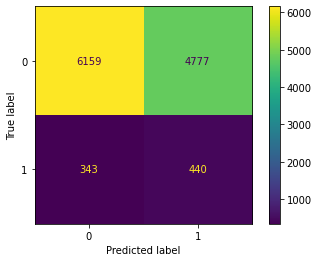

In [146]:
plot_confusion_matrix(rforest, X_test, y_test)

In [188]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.71     10936
           1       0.08      0.56      0.15       783

    accuracy                           0.56     11719
   macro avg       0.52      0.56      0.43     11719
weighted avg       0.89      0.56      0.67     11719



In [ ]:
min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(X_train, y_train)

    oob_error = 1 - rforest.oob_score_
    error_rate[i] = oob_error

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [58]:
from sklearn.svm import SVC

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_tr_os)
scaled_X_test = scaler.transform(X_test)

In [63]:
svm_model = SVC(class_weight='balanced', random_state=101, C=1.0)

In [ ]:
param_grid = {'C': [1.0, 5.0, 10.0, 100.0],
              'kernel': ['rbf', 'linear']}

In [ ]:
svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='f1')
svm_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

In [ ]:
svm_model = svm_grid.best_estimator_

In [65]:
svm_model.fit(scaled_X_train, y_tr_os)

SVC(class_weight='balanced', random_state=101)

In [67]:
pred = svm_model.predict(scaled_X_test)

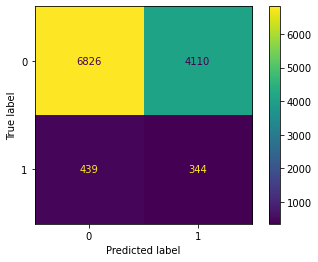

In [68]:
plot_confusion_matrix(svm_model, scaled_X_test, y_test)

In [115]:
import xgboost as xgb

In [147]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',)

In [71]:
param_grid = {'max_depth': [3, 4, 5]}

In [72]:
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=10)

In [148]:
xgb_grid_model.fit(x_tr_os, y_tr_os)

KeyboardInterrupt: ignored

In [189]:
xgb_model = xgb_grid_model.best_estimator_

In [190]:
xgb_model.set_params(n_estimators = 300)

XGBClassifier(max_depth=5, n_estimators=300)

In [191]:
xgb_model.fit(x_tr_os, y_tr_os)

XGBClassifier(max_depth=5, n_estimators=300)

In [192]:
pred = xgb_model.predict(X_test)

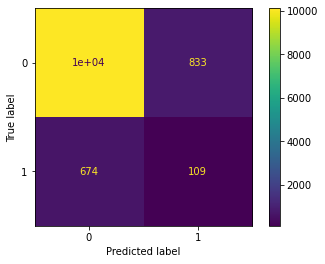

In [193]:
plot_confusion_matrix(xgb_model, X_test, y_test)

In [194]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10936
           1       0.12      0.14      0.13       783

    accuracy                           0.87     11719
   macro avg       0.53      0.53      0.53     11719
weighted avg       0.88      0.87      0.88     11719



In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [155]:
model = Sequential()

model.add(Dense(500, activation='relu',))
model.add(Dropout(0.4))

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(125, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [156]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [157]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [158]:
model.fit(x_tr_os, y_tr_os, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=150)

Epoch 1/150
687/687 [==============================] - 16s 22ms/step - loss: 0.6719 - accuracy: 0.5746 - val_loss: 0.6167 - val_accuracy: 0.6523
Epoch 2/150
687/687 [==============================] - 9s 14ms/step - loss: 0.5725 - accuracy: 0.6787 - val_loss: 0.5329 - val_accuracy: 0.6940
Epoch 3/150
687/687 [==============================] - 8s 12ms/step - loss: 0.5510 - accuracy: 0.6894 - val_loss: 0.5497 - val_accuracy: 0.6693
Epoch 4/150
687/687 [==============================] - 9s 13ms/step - loss: 0.5425 - accuracy: 0.6951 - val_loss: 0.5271 - val_accuracy: 0.6978
Epoch 5/150
687/687 [==============================] - 9s 13ms/step - loss: 0.5381 - accuracy: 0.6969 - val_loss: 0.5488 - val_accuracy: 0.6390
Epoch 6/150
687/687 [==============================] - 9s 13ms/step - loss: 0.5342 - accuracy: 0.6987 - val_loss: 0.5771 - val_accuracy: 0.6293
Epoch 7/150
687/687 [==============================] - 10s 14ms/step - loss: 0.5301 - accuracy: 0.7013 - val_loss: 0.5319 - val_accurac

In [159]:
loss_df = pd.DataFrame(model.history.history)

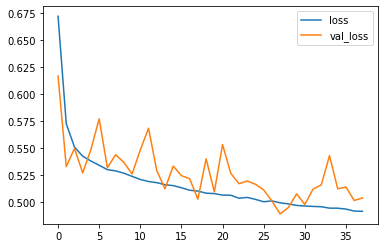

In [160]:
loss_df[['loss', 'val_loss']].plot()

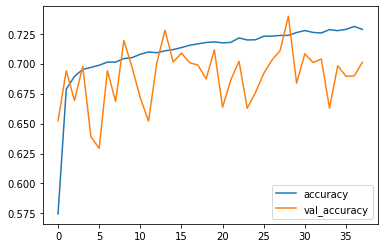

In [161]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [195]:
y_pred = model.predict(X_test)

367/367 [==============================] - 1s 2ms/step


In [196]:
pred = np.where(y_pred >= 0.50, 1, 0)

In [197]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     10936
           1       0.09      0.38      0.15       783

    accuracy                           0.70     11719
   macro avg       0.52      0.55      0.48     11719
weighted avg       0.89      0.70      0.77     11719



In [198]:
confusion_matrix(y_test, pred)

array([[7919, 3017],
       [ 485,  298]])

In [200]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     10936
           1       0.09      0.38      0.15       783

    accuracy                           0.70     11719
   macro avg       0.52      0.55      0.48     11719
weighted avg       0.89      0.70      0.77     11719



In [166]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [167]:
ada_model = AdaBoostClassifier()
gra_model = GradientBoostingClassifier()

In [168]:
ada_model.fit(x_tr_os, y_tr_os)

AdaBoostClassifier()

In [169]:
gra_model.fit(x_tr_os, y_tr_os)

GradientBoostingClassifier()

In [185]:
pred = ada_model.predict(X_test)

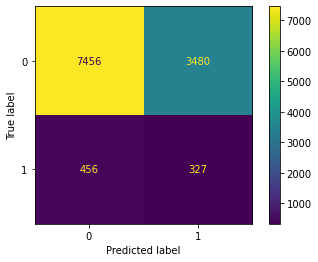

In [171]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [186]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     10936
           1       0.09      0.42      0.14       783

    accuracy                           0.66     11719
   macro avg       0.51      0.55      0.47     11719
weighted avg       0.89      0.66      0.75     11719



In [172]:
gra_pred = gra_model.predict(X_test)

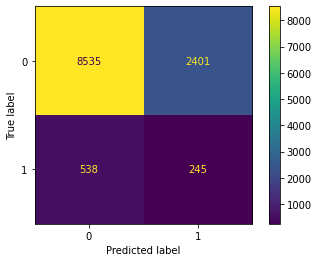

In [174]:
plot_confusion_matrix(gra_model, X_test, y_test)

In [175]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 101 kB/s 


In [176]:
from catboost import CatBoostClassifier

In [177]:
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    x_tr_os, y_tr_os,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [183]:
pred = clf.predict(X_test)

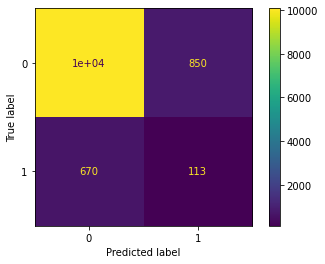

In [184]:
plot_confusion_matrix(clf, X_test, y_test)

In [178]:
from sklearn.naive_bayes import MultinomialNB

In [179]:
naive_model = MultinomialNB()

In [180]:
naive_model.fit(x_tr_os, y_tr_os)

MultinomialNB()

In [181]:
naive_predict = naive_model.predict(X_test)

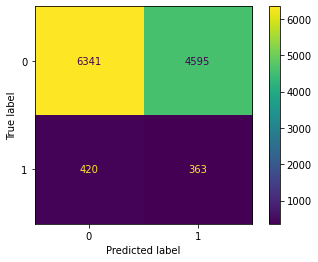

In [182]:
plot_confusion_matrix(naive_model, X_test, y_test)

In [199]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_zo1G9sv.csv to test_zo1G9sv.csv
User uploaded file "test_zo1G9sv.csv" with length 9134692 bytes


In [201]:
df_test = pd.read_csv('test_zo1G9sv.csv')

In [202]:
df_test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [203]:
X = df_test.drop(['policy_tenure', 'policy_id'],axis=1)

In [204]:
num = X[['age_of_car', 'age_of_policyholder', 'population_density']]

In [211]:
num_binned = pd.DataFrame(kbin.transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')

In [212]:
num_binned

,age_of_car_rank,age_of_policyholder_rank,population_density_rank
0,0.0,8.0,1.0
1,8.0,4.0,4.0
2,8.0,5.0,4.0
3,1.0,5.0,7.0
4,2.0,8.0,7.0
...,...,...,...
39058,9.0,9.0,6.0
39059,4.0,6.0,4.0
39060,8.0,2.0,4.0
39061,6.0,9.0,7.0


In [215]:
X.drop(['age_of_car',	'age_of_policyholder',	'population_density'], axis=1, inplace=True)

In [216]:
X['make']=X['make'].astype('object')
X['airbags']=X['airbags'].astype('object')
X['displacement']=X['displacement'].astype('object')
X['cylinder']=X['cylinder'].astype('object')
X['gear_box']=X['gear_box'].astype('object')
X['turning_radius']=X['turning_radius'].astype('object')
X['length']=X['length'].astype('object')
X['width']=X['width'].astype('object')
X['height']=X['height'].astype('object')
X['gross_weight']=X['gross_weight'].astype('object')
X['ncap_rating']=X['ncap_rating'].astype('object')

In [218]:
X = pd.get_dummies(X,)

In [229]:
X_all = pd.concat([num_binned, X], axis=1, join="inner")

In [230]:
X_all = X_all.reindex(columns = X_train.columns, fill_value=0)

In [231]:
df_test['is_claim'] = gra_model.predict(X_all)

In [232]:
df_test

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,1
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39058,ID97651,0.047982,0.15,0.740385,C2,27003,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
39059,ID97652,1.224838,0.05,0.509615,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
39060,ID97653,0.520287,0.12,0.355769,C6,13051,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
39061,ID97654,1.172391,0.08,0.644231,C5,34738,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [234]:
df_test[['policy_id', 'is_claim']].to_csv('submissions.csv', index=False)